In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tracks = gpd.read_parquet(
    "/home/fred/projects/open_gira/open-gira/results/storm_tracks/IBTrACS/tracks.geoparquet"
)

In [3]:
bbox = (92.109375, 0.703107, 113.115234, 23.966176)
xmin, ymin, xmax, ymax = bbox
aoi = tracks.cx[xmin: xmax, ymin: ymax]

/tmp/ipykernel_1267954/839226841.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


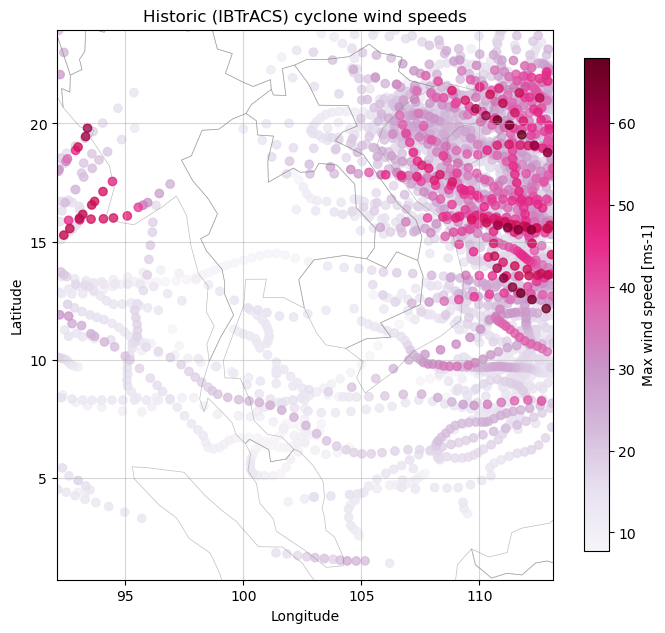

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.geometry = world.geometry.boundary
aoi.sort_values("max_wind_speed_ms", ascending=True).plot(
    column="max_wind_speed_ms",
    legend=True,
    cmap="PuRd",
    ax=ax,
    alpha=0.8,
    legend_kwds={
        "label": "Max wind speed [ms-1]",
        "shrink": 0.8,
    }
)
ax.set_xticks(np.linspace(95, 115, 5))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
world.plot(ax=ax, lw=0.5, color="grey", alpha=0.5)
ax.grid(alpha=0.5)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Historic (IBTrACS) cyclone wind speeds")
f.savefig("THA_IBTrACS_max_speed.png")